In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from sklearn.metrics import r2_score

from mechcell import MSDAnalyzer

fontsize = 13

plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "axes.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.handlelength": 2,
    }
)

### Reading the tracking data

In [17]:
tracks = pd.read_csv("../../data/hela_tracking_data/tracks_all_conf_nc.csv")
tracks = tracks.drop("Unnamed: 0", axis=1)
tracks

,Condensate ID,x_corr,y_corr,frame,area_cond,Frames visible,t,Condition,Video
0,1,-5.227800,0.950199,0,421,10,0,Non-Confined,8104
1,1,-5.334103,0.429437,1,386,10,1,Non-Confined,8104
2,1,-5.339330,-0.531052,2,523,10,2,Non-Confined,8104
3,1,-5.062690,-1.637142,3,410,10,3,Non-Confined,8104
4,1,-4.470663,-2.484570,4,407,10,4,Non-Confined,8104
...,...,...,...,...,...,...,...,...,...
1354,75,0.328868,0.578993,5,286,9,4,Confined,3626
1355,75,0.104523,0.875695,10,312,9,5,Confined,3626
1356,75,0.381766,0.640583,11,437,9,6,Confined,3626
1357,75,-0.011729,0.758711,12,385,9,7,Confined,3626


### Extracting mean MSD values

In [18]:
# Separate confined and non-confined tracks

tracks_conf = tracks.loc[tracks["Condition"] == "Confined"]
tracks_nc = tracks.loc[tracks["Condition"] == "Non-Confined"]

In [19]:
# Initiate MSDAnalyzer class
analyzer = MSDAnalyzer(tracks)

In [20]:
# Get MSD data for non-confined
MSDs_cond_nc = analyzer.process_condensates(tracks_nc)
cond_nc = analyzer.extract(MSDs_cond_nc)
msd_nc = analyzer.mean_MSD(cond_nc)
err_nc = analyzer.error_MSD(cond_nc)

print(MSDs_cond_nc)
msd_nc

[[0.5653763533317708, 1.59090806363062, 2.8153251942986723, 3.589023070889708, 3.132886620990818, 3.1593316489816186, 2.9990197549626614, 3.562638868013016], [0.565752469652899, 1.1825414693608387, 1.9472173160983393, 2.459315431536305, 1.8680525877509122, 1.277294360569886, 0.30999105289627765, 0.1975023252454166], [1.1598624975277525, 1.9266312133076098, 1.0446132288607703, 2.039215807283098, 4.210467893564], [0.45166337846445287, 1.2470116016561252, 2.093853546187983, 2.6370225934457774, 2.3387694954521976, 1.6411738167425847, 0.7102049517827341, 0.3481610124736517], [0.5244950595875042, 0.9360245755836183, 1.114602229608485, 1.0566663874376976, 1.2280388223919252, 1.9711564522258023, 1.9454325925394258, 2.389943764478558, 2.502389967458274, 2.7317759259016157, 3.3095260226585705, 4.004073559301094, 3.928237352274842, 2.7343407861141245, 2.9584383477709997, 4.629704596668788, 5.899995212425288, 6.3913474029904584], [0.3536050903404716, 0.4590535798141937, 0.5558006240938838], [0.524

[0.7690405287472211,
 1.2279829592297204,
 1.5314204211494162,
 1.9294278088113206,
 2.0835343220239886,
 2.3211113211901684,
 2.056041483292026,
 2.519209570499236,
 2.8216842460295415,
 2.767224079431389,
 2.880786445036838,
 2.964000246834878,
 2.9317329664224205,
 3.4851942067159687,
 3.3210428128997056,
 3.59740753104513,
 3.6662834971659515,
 2.8831829487952656,
 2.5873653701916575,
 3.013021657898697,
 3.6741561446222852,
 2.4351436254742826,
 3.4159638283972167,
 4.649416534091575,
 5.4551838499539045,
 8.277380783140185]

In [21]:
# Get MSD data for confined
MSDs_cond_conf = analyzer.process_condensates(tracks_conf)

cond_conf = analyzer.extract(MSDs_cond_conf)
msd_conf = analyzer.mean_MSD(cond_conf)
err_conf = analyzer.error_MSD(cond_conf)

msd_conf

[0.1209758487391427,
 0.20965849890861038,
 0.2814663548499563,
 0.34066799441513096,
 0.41755714938481797,
 0.4675061317465822,
 0.5439625198946024,
 0.5759534885865079,
 0.6306459046188979,
 0.7391943198451019,
 0.8440628959693292,
 0.9807013941373797,
 0.9805975310723737,
 1.050553764925323,
 1.1942387934948475,
 1.356790007066775,
 1.5966168361639708,
 1.781216274209298,
 1.9705440201553501,
 2.375596214922639,
 2.404249180014208,
 2.683435163246706,
 3.1425105631868595,
 3.462297190197896,
 2.735586153732343,
 1.9325246730467738,
 2.5101693518262254,
 2.9415493827792702,
 2.8706428985395305,
 4.013992741640514]

### Plotting mean MSD 

In [22]:
# Setting up the time axes
time_nc = np.arange(1, len(msd_nc) * 0.5, 0.5)  # can't start on zero because of log later
time_conf = np.arange(1, len(msd_conf) * 0.5, 0.5)

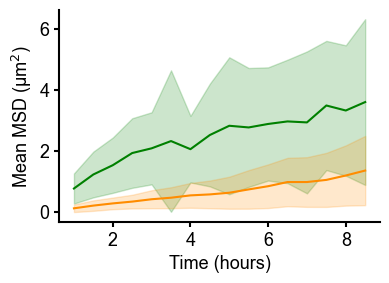

In [23]:
# Figure size
fig_width_mm = 105
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_in = fig_width_mm / 25.4
fig_height_in = fig_height_mm / 25.4

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in))

# Plot the first 16 data points due to data abundance
ax.plot(time_nc[:16], msd_nc[:16], label="Non-confined", color="green")
ax.plot(time_conf[:16], msd_conf[:16], label="Confined", color="darkorange")

# Add error bars
ax.fill_between(
    time_nc[:16],
    [mean - err for mean, err in zip(msd_nc[:16], err_nc[:16])],
    [mean + err for mean, err in zip(msd_nc[:16], err_nc[:16])],
    alpha=0.2,
    color="green",
)

ax.fill_between(
    time_conf[:16],
    [mean - err for mean, err in zip(msd_conf[:16], err_conf[:16])],
    [mean + err for mean, err in zip(msd_conf[:16], err_conf[:16])],
    alpha=0.2,
    color="darkorange",
)

# Set labels and legend
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Mean MSD (µm$^2$)")

# Hide top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
lw = 1.5
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
ax.spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
ax.tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

# Save the plot
plt.savefig("../../Figures/Figure4/Figure4A.pdf", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()

### Linear fitting and calculating diffusion coefficients

In [27]:
# Setting up the time axes
time_nc = np.arange(0.5, len(msd_nc) * 0.5, 0.5)  # can't start on zero because of log later
time_conf = np.arange(0.5, len(msd_conf) * 0.5, 0.5)

time_nc_log = np.log(time_nc)
time_conf_log = np.log(time_conf)

msd_nc_log = np.log(msd_nc)
msd_conf_log = np.log(msd_conf)

# Log-log linear regression
linear_model_nc = linregress(time_nc_log[:16], msd_nc_log[:16])
linear_model_conf = linregress(time_conf_log[:16], msd_conf_log[:16])

alpha_nc = linear_model_nc.slope
alpha_conf = linear_model_conf.slope
diffusion_coef_nc = np.exp(linear_model_nc.intercept)
diffusion_coef_conf = np.exp(linear_model_conf.intercept)
diffusion_coef_ratio = diffusion_coef_nc / diffusion_coef_conf

print(f"{alpha_nc=}")
print(f"{alpha_conf=}")
print(f"{diffusion_coef_nc=}")
print(f"{diffusion_coef_conf=}")
print(f"{diffusion_coef_ratio=}")

alpha_nc=0.5188176245767445
alpha_conf=0.8470314127731194
diffusion_coef_nc=1.2131998113226656
diffusion_coef_conf=0.19889906478518082
diffusion_coef_ratio=6.099575242512937


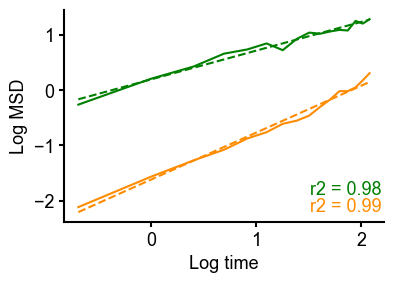

In [29]:
# Define figure size in millimeters
fig_width_mm = 105
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_in = fig_width_mm / 25.4
fig_height_in = fig_height_mm / 25.4

fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in))

# Calculate the predicted values
linear_fit_nc = linear_model_nc.slope * time_nc_log + linear_model_nc.intercept
linear_fit_conf = linear_model_conf.slope * time_conf_log + linear_model_conf.intercept

# Calculate R2 scores
r2_nc = r2_score(msd_nc_log[:16], linear_fit_nc[:16])
r2_conf = r2_score(msd_conf_log[:16], linear_fit_conf[:16])

# Plot linear curve for non-confined
ax.plot(
    time_nc_log[:16],
    linear_model_nc.intercept + linear_model_nc.slope * time_nc_log[:16],
    linestyle="--",
    color="green",
)
# Plot linear curve for confined
ax.plot(
    time_conf_log[:16],
    linear_model_conf.intercept + linear_model_conf.slope * time_conf_log[:16],
    linestyle="--",
    color="darkorange",
)
# Plot msd data
ax.plot(time_nc_log[:16], msd_nc_log[:16], color="green")
ax.plot(time_conf_log[:16], msd_conf_log[:16], color="darkorange")

ax.set_xlabel("Log time")
ax.set_ylabel("Log MSD")

plt.annotate(f"r2 = {r2_nc:.2f}", xy=(0.77, 0.13), xycoords="axes fraction", color="green", fontsize=13)
plt.annotate(f"r2 = {r2_conf:.2f}", xy=(0.77, 0.05), xycoords="axes fraction", color="darkorange", fontsize=13)

# Hide top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
lw = 1.5
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(lw)
ax.spines["bottom"].set_linewidth(lw)
ax.tick_params(axis="both", which="major", width=lw)

# Save the plot
plt.savefig("../../Figures/Figure4/Figure4B.pdf", bbox_inches="tight", dpi=300)

plt.show()